In [1]:
from IPython.display import display, Math, Latex
import numpy as np 
import pandas as pd 

%matplotlib inline
import matplotlib 
import matplotlib.pyplot as plt 
import matplotlib.colors as colors 
from matplotlib.patches import Ellipse

In [2]:
# Import AuriGaia 
import sys 
sys.path.insert(0, './aurigaia-examples') 
import read_aurigaia as ra 

In [3]:
# Import Halo 24 with some angle 
import os
basedir = os.path.join('HITS', 'v1', 'kroupaIMF', 'level3_MHD', 'halo_24', 'mockdir_angle030')
basename = 'mock_030'
fsample = 1 #0.1

In [4]:
# https://auriga.h-its.org/gaiamock.html
data = ra.read_aurigaia(basedir, basename, 
    datasets=("VabsMagnitude",
              "IabsMagnitude",
              "GBmagnitude",
              "GRmagnitude",
              "Gmagnitude",
              "GBmagnitudeObs",
              "GRmagnitudeObs",
              "GmagnitudeObs",
              "GBmagnitudeError",
              "GRmagnitudeError",
              "GmagnitudeError",
              "Magnitudes",
              "Age",
              "Metallicity",
              "HCoordinates",
              "HCoordinatesObs",
              "HCoordinateErrors",
              "EffectiveTemperature",
              "EffectiveTemperatureError",
              "EffectiveTemperatureObs",
              "SurfaceGravity",
              "SurfaceGravityObs",
              "SurfaceGravityError"),
    filters=(ra.RandomSampleFilter(fsample),))

Reading:  HITS/v1/kroupaIMF/level3_MHD/halo_24/mockdir_angle030/mock_030.0.hdf5
Reading:  HITS/v1/kroupaIMF/level3_MHD/halo_24/mockdir_angle030/mock_030.1.hdf5
Reading:  HITS/v1/kroupaIMF/level3_MHD/halo_24/mockdir_angle030/mock_030.2.hdf5
Reading:  HITS/v1/kroupaIMF/level3_MHD/halo_24/mockdir_angle030/mock_030.3.hdf5
Reading:  HITS/v1/kroupaIMF/level3_MHD/halo_24/mockdir_angle030/mock_030.4.hdf5
Reading:  HITS/v1/kroupaIMF/level3_MHD/halo_24/mockdir_angle030/mock_030.5.hdf5
Reading:  HITS/v1/kroupaIMF/level3_MHD/halo_24/mockdir_angle030/mock_030.6.hdf5
Reading:  HITS/v1/kroupaIMF/level3_MHD/halo_24/mockdir_angle030/mock_030.7.hdf5
Reading:  HITS/v1/kroupaIMF/level3_MHD/halo_24/mockdir_angle030/mock_030.8.hdf5
Reading:  HITS/v1/kroupaIMF/level3_MHD/halo_24/mockdir_angle030/mock_030.9.hdf5
Reading:  HITS/v1/kroupaIMF/level3_MHD/halo_24/mockdir_angle030/mock_030.10.hdf5
Reading:  HITS/v1/kroupaIMF/level3_MHD/halo_24/mockdir_angle030/mock_030.11.hdf5
Reading:  HITS/v1/kroupaIMF/level3_MHD

In [5]:
mag_v_abs = data["VabsMagnitude"]
mag_i_abs = data["IabsMagnitude"]

bands = 'UBRJHKVI'

mag_v_app = data["Magnitudes"][:,bands.index('V')]
mag_j_app = data["Magnitudes"][:,bands.index('J')]
mag_k_app = data["Magnitudes"][:,bands.index('K')]

In [6]:
print("{:,}".format(len(mag_v_abs)), "stars")

126,083,342 stars


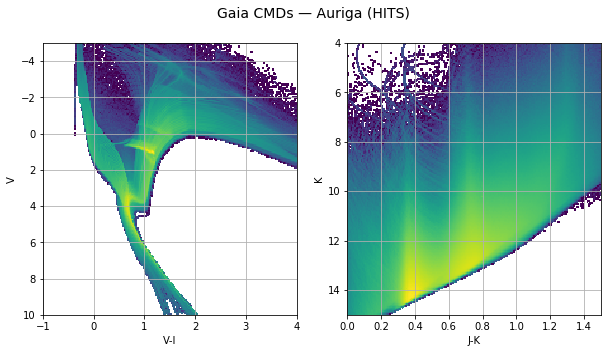

In [7]:
# Produce color-magnitude diagrams 
fig = plt.figure(figsize=(10, 5))
fig.suptitle("Gaia CMDs — Auriga (HITS)", fontsize=14)

# V vs I-V
plt.subplot(121)
plt.hist2d(
    mag_v_abs-mag_i_abs, 
    mag_v_abs, 
    bins=200, 
    range=((-1, 4), (-5, 10)), 
    norm=colors.LogNorm())
plt.ylim(10, -5)
plt.xlabel("V-I")
plt.ylabel("V")
plt.grid()

# K vs J-K
plt.subplot(122)
plt.hist2d(
    mag_j_app-mag_k_app, 
    mag_k_app, 
    bins=200, 
    range=((0, 1.5), (4, 15)),
    norm=colors.LogNorm())
plt.ylim(15, 4)
plt.xlabel("J-K")
plt.ylabel("K")
plt.grid()

In [8]:
ras  = np.degrees(data["HCoordinates"][:,0])
decs = np.degrees(data["HCoordinates"][:,1])

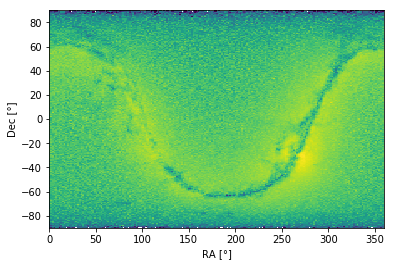

In [9]:
plt.hist2d(
    ras, 
    decs, 
    bins=200, 
    norm=colors.LogNorm())
plt.xlabel("RA [°]")
plt.ylabel("Dec [°]")
plt.show()

In [10]:
# Perform cuts in G magnitude etc as per Grand et al. 2018

G    = data['GmagnitudeObs']
G_BP = data['GBmagnitudeObs']
G_RP = data['GRmagnitudeObs']

G_err    = data['GmagnitudeError']
G_BP_err = data['GBmagnitudeError']
G_RP_err = data['GRmagnitudeError']

parallaxes = data["HCoordinatesObs"][:,2]
parallax_err = data["HCoordinateErrors"][:,2]

idx = np.logical_and(parallaxes>=0, 
    np.logical_and(parallax_err/parallaxes < .1, 
    np.logical_and(G_err < 0.22, 
    np.logical_and(G_BP_err < 0.054, G_RP_err < 0.054))))

M_G = G[idx] - 5*np.log10(1/(10*parallaxes[idx]))
print("{:,}".format(len(M_G)), "stars")
#print(np.max(M_G[idx]))

50,385,074 stars


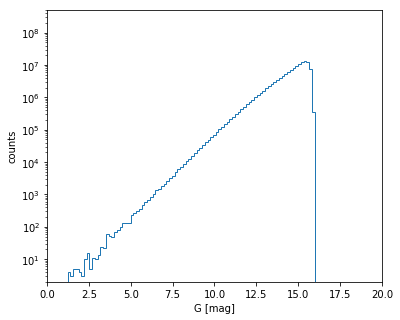

In [11]:
# Reproduce Grand et al. 2018, fig. 4 (left panel)
fig = plt.figure(figsize=(6, 5))
plt.hist(G, bins=100, histtype='step')
plt.xlabel("G [mag]")
plt.ylabel("counts")
plt.xlim([0, 20])
plt.ylim([2*10**0*fsample, 5*10**8*fsample])
ax = plt.gca()
ax.set_yscale("log", nonposy='clip')
plt.show()

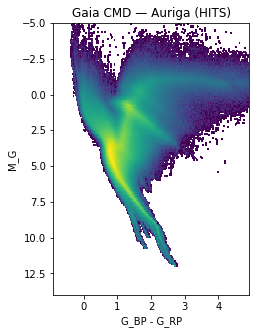

In [12]:
# Reproduce Grand et al. 2018, fig. 5 (left panel)
fig = plt.figure(figsize=(3.5, 5))
plt.title('Gaia CMD — Auriga (HITS)')
plt.hist2d(
    (G_BP - G_RP)[idx], 
    M_G, #M_G, 
    bins=200, 
    range=[[-0.9, 4.9], [-5, 14]],
    #cmap=color_map)
    norm=colors.LogNorm())
plt.gca().invert_yaxis()
plt.xlabel("G_BP - G_RP")#r"$G_{\text{BP}} - G_{\text{RP}}$")
plt.ylabel("M_G")#r"$\text{M_G}$")
#plt.grid()
plt.show()

In [13]:
# Locate the Kepler field of view
# https://archive.stsci.edu/prepds/usno_kepler/
kep_RA = 290.6667
kep_Dec = 44.5
kep_RA_up = 301.9
kep_Dec_up = 52.5

print('Kepler FOV')
print(kep_RA, kep_Dec)

Kepler FOV
290.6667 44.5


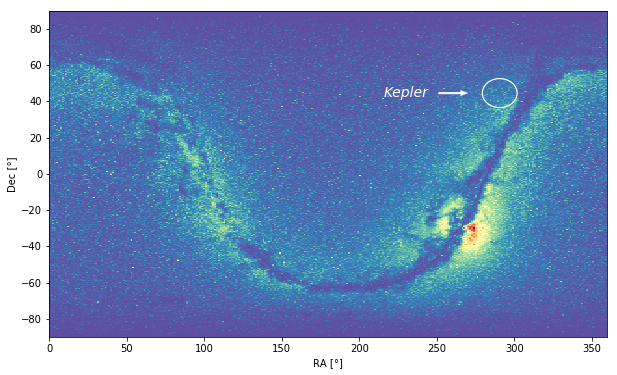

In [14]:
color_map = plt.cm.Spectral_r 
fig, ax = plt.subplots(figsize=(10,6))
plt.hist2d(ras, decs,
    bins=300, 
    cmap=color_map)
plt.xlabel("RA [°]")
plt.ylabel("Dec [°]")
ax.add_artist(Ellipse(
    (kep_RA, kep_Dec), 
    (kep_RA_up-kep_RA)*2, 
    (kep_Dec_up-kep_Dec)*2, 
    color='w', fill=False, linewidth=1.2))
plt.annotate('Kepler', 
    [kep_RA-np.degrees(1.31), kep_Dec-np.degrees(0.04)], 
    style='italic', color='w', fontsize=14)
plt.arrow(kep_RA-np.degrees(0.69), kep_Dec, np.degrees(0.25), 0, 
    color='w', width=1, linewidth=0.3)
plt.show()

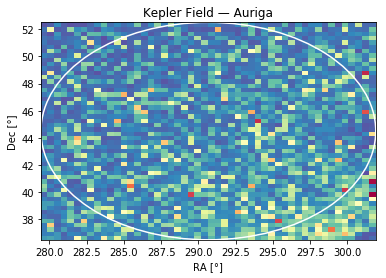

In [15]:
fig, ax = plt.subplots()
plt.hist2d(ras, decs,
    bins=50, 
    cmap=color_map, 
    range=[[2*kep_RA-kep_RA_up, kep_RA_up],
           [2*kep_Dec-kep_Dec_up, kep_Dec_up]])
ax.add_artist(Ellipse(
    (kep_RA, kep_Dec), 
    (kep_RA_up-kep_RA)*2, 
    (kep_Dec_up-kep_Dec)*2, 
    color='w', fill=False, linewidth=1.5))
plt.xlabel("RA [°]")
plt.ylabel("Dec [°]")
plt.title('Kepler Field — Auriga')
plt.show()

In [16]:
kep_idx = np.logical_and(
    np.logical_and(2*kep_RA-kep_RA_up < ras, 
                   ras < kep_RA_up),
    np.logical_and(2*kep_Dec-kep_Dec_up < decs, 
                   decs < kep_Dec_up))
print("{:,}".format(len(decs[kep_idx])), "stars in the Kepler FOV")

1,014,241 stars in the Kepler FOV


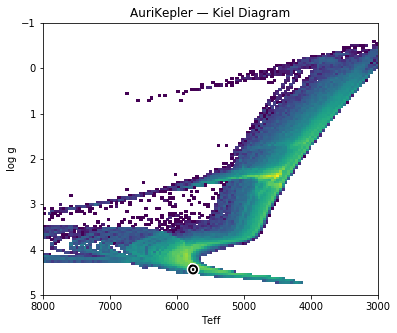

In [17]:
# Theoretical Kiel diagram of the Kepler field 
fig = plt.figure(figsize=(6, 5))
plt.title('AuriKepler — Kiel Diagram')
plt.hist2d(
    data['EffectiveTemperature'][kep_idx], 
    data['SurfaceGravity'][kep_idx], 
    bins=125, 
    range=[[3000, 8000], [-1, 5]],
    #cmap=color_map)
    norm=colors.LogNorm())
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
#plt.axhline(0, linestyle='--', color='k')
plt.xlabel("Teff")
plt.ylabel("log g")
plt.plot(5772, 4.438, marker=r'$\odot$', color='white', 
    markersize=10, mew=4)
plt.plot(5772, 4.438, marker=r'$\odot$', color='black',
    markersize=10, mew=1)
plt.show()

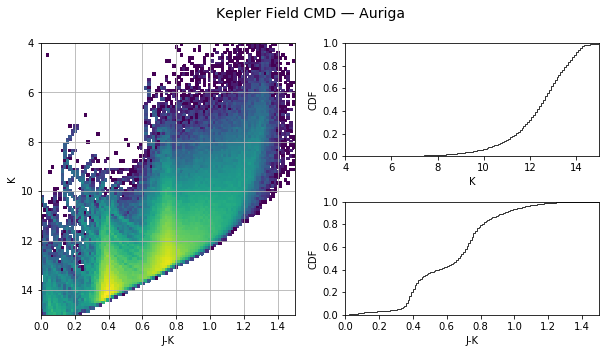

In [18]:
# Kepler Auriga color-magnitude diagram 
# confer with Silva Aguirre et al. 2018, fig. 2 
fig = plt.figure(figsize=(10, 5))
fig.suptitle("Kepler Field CMD — Auriga", fontsize=14)

# K vs J-K
plt.subplot(121)
plt.hist2d(
    mag_j_app[kep_idx]-mag_k_app[kep_idx], 
    mag_k_app[kep_idx], 
    bins=100, 
    range=[[0, 1.5], [4, 15]],
    norm=colors.LogNorm())
plt.gca().invert_yaxis()
plt.xlabel("J-K")
plt.ylabel("K")
plt.grid()

# cumulative K distribution 
plt.subplot(222)
plt.hist(mag_k_app[kep_idx], 
         density=1,
         cumulative=True, 
         bins=200,
         label='CDF', 
         histtype='step', 
         alpha=0.8, 
         color='k')
plt.ylim([0, 1])
plt.xlim([4, 15])
plt.ylabel('CDF')
plt.xlabel('K')

# cumulative J-K distribution 
plt.subplot(224)
plt.hist(mag_j_app[kep_idx]-mag_k_app[kep_idx], 
         density=1,
         cumulative=True, 
         bins=200,
         label='CDF', 
         histtype='step', 
         alpha=0.8, 
         color='k')
plt.xlim([0, 1.5])
plt.ylim([0, 1])
plt.ylabel('CDF')
plt.xlabel('J-K')

plt.subplots_adjust(wspace=0.2, hspace=0.4)
plt.show()

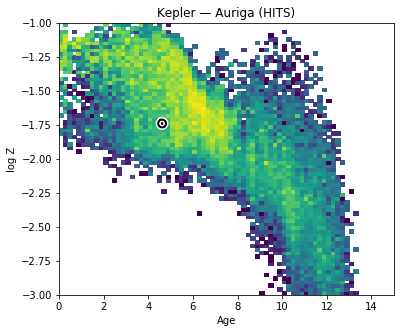

In [19]:
# Theoretical age-metallicity relation 
Z = data['Metallicity'][kep_idx] 
fig = plt.figure(figsize=(6, 5))
plt.title('Kepler — Auriga (HITS)')
plt.hist2d(
    data['Age'][kep_idx][Z>0], 
    np.log10(Z[Z>0]), 
    bins=75, 
    range=[[0, 15], [-3, -1]],
    norm=colors.LogNorm())
plt.xlabel("Age")
plt.ylabel("log Z")
# Plot the solar symbol
plt.plot(4.57, np.log10(0.0185), marker=r'$\odot$', 
    markersize=10, mew=4, color='white')
plt.plot(4.57, np.log10(0.0185), marker=r'$\odot$', 
    markersize=10, mew=1, color='black')

plt.show()

In [20]:
# Load data for Kepler red giants with asteroseismic ages 
apokasc_df = pd.read_table('APOKASC_Ages_Earl_261018.txt', sep='\s+')
apokasc_df 

,n,2MASS,Mass,sMass,Rad,sRad,Grav,sGrav,Dist,sDist,...,sAge,[M/H],[Fe/H],sMetl,Teff,sTeff,Alpha,sAlpha,Prob,Popul
0,1,J18583782+4822494,1.6267,0.1244,11.2634,0.3117,2.5553,0.0096,1642.119,54.350,...,379.296,-0.11,-0.11,0.12,4885.5,69.3,0.01,0.01,0.0060,low-alpha
1,2,J18582020+4824064,1.4486,0.1739,11.8646,0.5852,2.4605,0.0130,1662.235,78.850,...,1301.378,-0.25,-0.30,0.13,4875.3,69.3,0.07,0.02,0.0042,low-alpha
2,3,J18571019+4848067,1.2233,0.0731,11.1152,0.2883,2.4381,0.0077,1180.160,37.211,...,1917.905,-0.03,-0.02,0.12,4746.7,69.3,-0.01,0.01,0.0025,low-alpha
3,4,J18584464+4857075,1.5011,0.1177,13.1825,0.3599,2.3741,0.0101,1327.835,42.940,...,1053.730,-0.05,-0.06,0.13,4567.1,69.3,0.01,0.01,0.0039,low-alpha
4,5,J18583500+4906208,1.5139,0.0483,5.8445,0.0523,3.0852,0.0048,364.368,10.016,...,364.201,-0.05,-0.04,0.12,4912.1,69.3,-0.01,0.01,0.0090,low-alpha
5,6,J18581445+4901055,1.2187,0.0734,10.9389,0.2470,2.4450,0.0114,1936.346,47.791,...,1534.128,0.01,-0.01,0.11,4776.3,69.3,0.03,0.01,0.0000,low-alpha
6,7,J19004144+4836005,2.2321,0.1434,9.7648,0.2034,2.8080,0.0081,976.138,33.283,...,213.467,0.07,0.08,0.11,4855.5,69.3,-0.01,0.01,0.0159,low-alpha
7,8,J19013400+4908307,1.4193,0.0715,11.2662,0.2759,2.4932,0.0090,1876.870,52.532,...,766.180,-0.02,-0.03,0.12,4842.5,69.3,0.01,0.01,0.0001,low-alpha
8,9,J19003958+4858122,1.0929,0.0977,11.0671,0.3830,2.3891,0.0117,1614.391,55.491,...,4081.178,0.16,0.15,0.11,4620.4,69.3,0.01,0.01,0.0000,low-alpha
9,10,J19032139+4847102,1.1959,0.0940,8.6036,0.2314,2.6449,0.0088,505.338,17.141,...,1835.332,-0.09,-0.11,0.12,4697.9,69.3,0.04,0.01,0.0057,low-alpha


In [21]:
# Obtain AuriGaia stars in the Kepler field with the same colors and magnitudes as the sample 
mag_j_app = data["Magnitudes"][:,bands.index('J')] 
mag_k_app = data["Magnitudes"][:,bands.index('K')] 

## Color and magnitude ranges
M_range = [9.4,   12.46]  # KS 1.6% AD 3.0%
C_range = [0.545,  0.741] # KS 1.8% AD 1.3%

kep_idx_cuts = np.logical_and(kep_idx,
    np.logical_and((mag_j_app - mag_k_app) >= C_range[0],
    np.logical_and((mag_j_app - mag_k_app) <= C_range[1],
    np.logical_and(mag_k_app + 0.35 + 3.28*(mag_j_app - mag_k_app)/0.99 >= M_range[0],
                   mag_k_app + 0.35 + 3.28*(mag_j_app - mag_k_app)/0.99 <= M_range[1]))))

print("{:,}".format(kep_idx_cuts.sum()), "stars")

5,088 stars


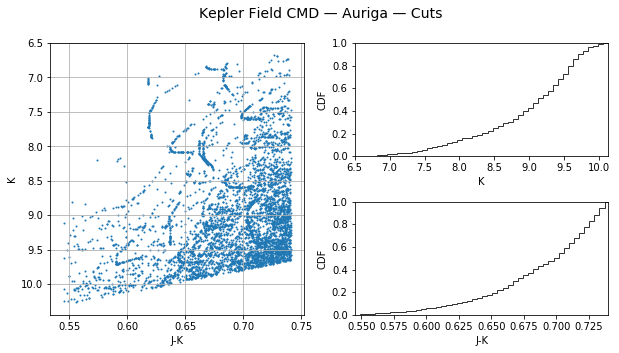

In [22]:
# Kepler Auriga color-magnitude diagram after cuts 
# confer with Silva Aguirre et al. 2018, fig. 2 
fig = plt.figure(figsize=(10, 5))
fig.suptitle("Kepler Field CMD — Auriga — Cuts", fontsize=14)
plt.subplot(121)
plt.scatter(
    mag_j_app[kep_idx_cuts]-mag_k_app[kep_idx_cuts], 
    mag_k_app[kep_idx_cuts],
    s=1)
plt.gca().invert_yaxis()
plt.xlabel("J-K")
plt.ylabel("K")
plt.grid()

plt.subplot(222)
plt.hist(mag_k_app[kep_idx_cuts], 
         density=1,
         cumulative=True, 
         bins=50,
         label='CDF', 
         histtype='step', 
         alpha=0.8, 
         color='k')
plt.ylim([0, 1])
plt.xlim([6.5, 10.13])
plt.ylabel('CDF')
plt.xlabel('K')

plt.subplot(224)
plt.hist(mag_j_app[kep_idx_cuts]-mag_k_app[kep_idx_cuts], 
         density=1,
         cumulative=True, 
         bins=50,
         label='CDF', 
         histtype='step', 
         alpha=0.8, 
         color='k')
plt.xlim([0.545,  0.74])
plt.ylim([0, 1])
plt.ylabel('CDF')
plt.xlabel('J-K')

plt.subplots_adjust(wspace=0.2, hspace=0.4)
plt.show()

In [23]:
# Calculate [Fe/H] by assuming a galactic chemical evolution law: 
# Y = Y_p + Z * deltaY/deltaZ 
# where primordial helium Y_p = 0.2463 
# and deltaY/deltaZ = 1.4. 
# Values taken from Pietrinferni et al. 2004 

Y_p = 0.245 
dYdZ = 1.4 

Z = data['Metallicity']
kep_idx2 = np.logical_and(kep_idx_cuts, Z>0)
Z = Z[kep_idx2]
Y = Y_p + Z * dYdZ
X = 1 - Y - Z
FeH = np.log10(Z/X/0.02293)

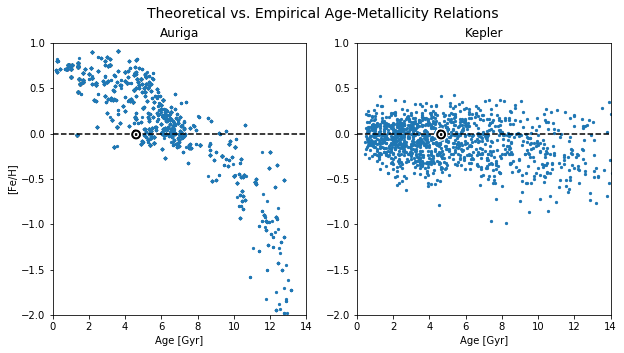

In [24]:
# Compare theoretical (left) and empirical (right) age-metallicity relations 

fig = plt.figure(figsize=(10, 5))
plt.suptitle('Theoretical vs. Empirical Age-Metallicity Relations', fontsize=14)

plt.subplot(1,2,1)
plt.title('Auriga')
plt.scatter(data['Age'][kep_idx2], FeH,
    s=5)
plt.axhline(0, linestyle='--', color='k')
plt.xlim([0, 14])
plt.ylim([-2, 1])
plt.xlabel("Age [Gyr]")
plt.ylabel("[Fe/H]")
plt.plot(4.57, 0, marker=r'$\odot$', 
    markersize=10, mew=4, color='white')
plt.plot(4.57, 0, marker=r'$\odot$', 
    markersize=10, mew=1, color='black')

plt.subplot(1,2,2)
plt.title('Kepler')
plt.scatter(apokasc_df['Age']/10**3, apokasc_df['[Fe/H]'],
    s=5)
plt.axhline(0, linestyle='--', color='k')
plt.xlim([0, 14])
plt.ylim([-2, 1])
plt.xlabel("Age [Gyr]")
plt.plot(4.57, 0, marker=r'$\odot$', 
    markersize=10, mew=4, color='white')
plt.plot(4.57, 0, marker=r'$\odot$', 
    markersize=10, mew=1, color='black')

plt.show()